In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('login.csv')

In [4]:
customerKey=data['customerKey'][0]
customerSecret=data['customerSecret'][0]
accessToken=data['accessToken'][0]
accessSecret=data['accessSecret'][0]

In [6]:
#create authenticate object
authenticate = tweepy.OAuthHandler(customerKey, customerSecret)
#set accessToken & accessSecret
authenticate.set_access_token(accessToken, accessSecret)
#create API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [7]:
#get the Bitcoin tweets(3000)
search_item = '#bitcoin -filter:retweets'
#create cursor object
tweets = tweepy.Cursor(api.search, q=search_item, lang='en', since = '2020-02-01', tweet_mode= 'extended').items(3000)
#store tweet and get full text
all_tweets = [tweet.full_text for tweet in tweets]

In [12]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head()

,Tweets
0,"Long on love, long on #Bitcoin"
1,"Perpetual $BTC/USDT, 4h, @binance .\n\nSeeing ..."
2,If #Bitcoin can hold the low put in last nigh...
3,#Bitcoin is hope https://t.co/2WWjqmxNRi
4,Crypto\nCrypt\nCryp\nCry 😢😢😢\n\n#cryptocrash #...


In [13]:
#Clean tweets
def cleanTweets(tweets, pattern):
    r = re.findall(pattern, tweets)
    for word in r:
        tweets = re.sub(word,"",tweets)
    return tweets

In [14]:
# df['Tweets'] = np.vectorize(cleanTweets)(df['Tweets'], 'https?:\/\/\S+')
df['Tweets'] = np.vectorize(cleanTweets)(df['Tweets'], '@[\w]*')
df['Tweets'] = np.vectorize(cleanTweets)(df['Tweets'], '\\n')
df.head(10)

,Tweets
0,"Long on love, long on #Bitcoin"
1,"Perpetual $BTC/USDT, 4h, .Seeing such high vo..."
2,If #Bitcoin can hold the low put in last nigh...
3,#Bitcoin is hope https://t.co/2WWjqmxNRi
4,CryptoCryptCrypCry 😢😢😢#cryptocrash #Crypto #cr...
5,Congrats to those who bought $btc resp. $ada a...
6,#camgirl #webmodel #show #chaturbategirl #boo...
7,he is the mastermind behind crypto and the ...
8,#Bitcoin Spring type action underway. The dip ...
9,"Hey, get 20 TRADE tokens and spread great tech..."


In [15]:
# remove Special characters
df['CleanTweets'] = df['Tweets'].str.replace("[^a-zA-Z0-9#]"," ")
df['CleanTweets'] = df['Tweets'].str.replace('https?:\/\/\S+', ' ')
df.head(10)

,Tweets,CleanTweets
0,"Long on love, long on #Bitcoin","Long on love, long on #Bitcoin"
1,"Perpetual $BTC/USDT, 4h, .Seeing such high vo...","Perpetual $BTC/USDT, 4h, .Seeing such high vo..."
2,If #Bitcoin can hold the low put in last nigh...,If #Bitcoin can hold the low put in last nigh...
3,#Bitcoin is hope https://t.co/2WWjqmxNRi,#Bitcoin is hope
4,CryptoCryptCrypCry 😢😢😢#cryptocrash #Crypto #cr...,CryptoCryptCrypCry 😢😢😢#cryptocrash #Crypto #cr...
5,Congrats to those who bought $btc resp. $ada a...,Congrats to those who bought $btc resp. $ada a...
6,#camgirl #webmodel #show #chaturbategirl #boo...,#camgirl #webmodel #show #chaturbategirl #boo...
7,he is the mastermind behind crypto and the ...,he is the mastermind behind crypto and the ...
8,#Bitcoin Spring type action underway. The dip ...,#Bitcoin Spring type action underway. The dip ...
9,"Hey, get 20 TRADE tokens and spread great tech...","Hey, get 20 TRADE tokens and spread great tech..."


In [16]:
df['CleanTweets'] = df['Tweets'].apply(lambda x: " ".join([word for word in x.split() if len(word)>3]))
df.head()

,Tweets,CleanTweets
0,"Long on love, long on #Bitcoin","Long love, long #Bitcoin"
1,"Perpetual $BTC/USDT, 4h, .Seeing such high vo...","Perpetual $BTC/USDT, .Seeing such high volume ..."
2,If #Bitcoin can hold the low put in last nigh...,"#Bitcoin hold last night $34,760, flip supply ..."
3,#Bitcoin is hope https://t.co/2WWjqmxNRi,#Bitcoin hope https://t.co/2WWjqmxNRi
4,CryptoCryptCrypCry 😢😢😢#cryptocrash #Crypto #cr...,CryptoCryptCrypCry 😢😢😢#cryptocrash #Crypto #cr...


In [17]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
tokenized_tweet = df['CleanTweets'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0                        [Long, love,, long, #Bitcoin]
1    [Perpetual, $BTC/USDT,, .Seeing, such, high, v...
2    [#Bitcoin, hold, last, night, $34,760,, flip, ...
3            [#Bitcoin, hope, https://t.co/2WWjqmxNRi]
4    [CryptoCryptCrypCry, 😢😢😢#cryptocrash, #Crypto,...
5    [Congrats, those, bought, $btc, resp., $ada, $...
6    [#camgirl, #webmodel, #show, #chaturbategirl, ...
7    [mastermind, behind, crypto, owner, best, exch...
8    [#Bitcoin, Spring, type, action, underway., $2...
9    [Hey,, TRADE, tokens, spread, great, technolog...
Name: CleanTweets, dtype: object

In [19]:
from nltk.stem.porter import PorterStemmer
stemmer  = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x])
tokenized_tweet.head()

0                        [long, love,, long, #bitcoin]
1    [perpetu, $btc/usdt,, .see, such, high, volum,...
2    [#bitcoin, hold, last, night, $34,760,, flip, ...
3            [#bitcoin, hope, https://t.co/2wwjqmxnri]
4    [cryptocryptcrypcri, 😢😢😢#cryptocrash, #crypto,...
Name: CleanTweets, dtype: object

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['CleanTweets'] = tokenized_tweet
df.head()

,Tweets,CleanTweets
0,"Long on love, long on #Bitcoin","long love, long #bitcoin"
1,"Perpetual $BTC/USDT, 4h, .Seeing such high vo...","perpetu $btc/usdt, .see such high volum potent..."
2,If #Bitcoin can hold the low put in last nigh...,"#bitcoin hold last night $34,760, flip suppli ..."
3,#Bitcoin is hope https://t.co/2WWjqmxNRi,#bitcoin hope https://t.co/2wwjqmxnri
4,CryptoCryptCrypCry 😢😢😢#cryptocrash #Crypto #cr...,cryptocryptcrypcri 😢😢😢#cryptocrash #crypto #cr...


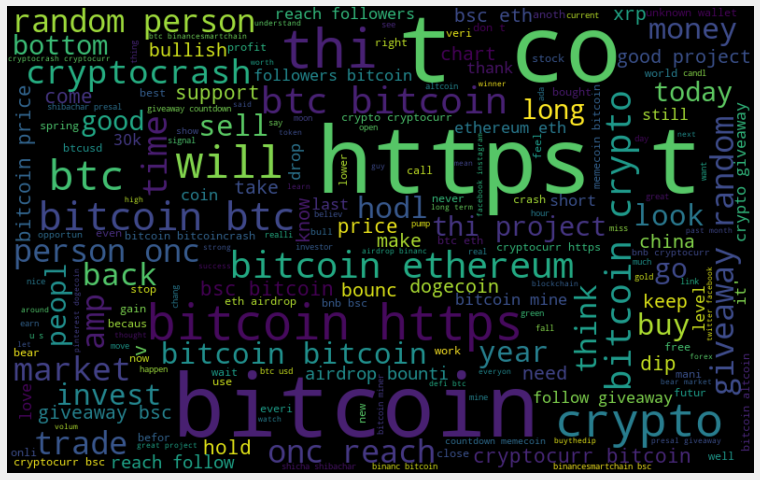

In [21]:
all_words = " ".join([x for x in df['CleanTweets']])

from wordcloud import WordCloud
word_cloud = WordCloud(width = 800, height=500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
# hashtag
def hashtagTweets(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [23]:
hashtag = hashtagTweets(df['CleanTweets']) 
hashtag[:6]

[['bitcoin'],
 ['bitcoin'],
 ['bitcoin', 'altcoin'],
 ['bitcoin'],
 ['cryptocrash',
  'crypto',
  'cryptocurr',
  'cryptonew',
  'cryptotrad',
  'bitcoin',
  'bitcoincrash'],
 ['bitcoin', 'altcoin', 'altcoinseason2021', 'cryptocurr']]

In [24]:
hashtag = sum(hashtag, [])
hashtag[:6]
            

['bitcoin', 'bitcoin', 'bitcoin', 'altcoin', 'bitcoin', 'cryptocrash']

In [25]:
dist = nltk.FreqDist(hashtag)
d = pd.DataFrame({'Hashtag': list(dist.keys()),
                 'Count': list(dist.values())})
d.head()

,Hashtag,Count
0,bitcoin,3045
1,altcoin,76
2,cryptocrash,186
3,crypto,464
4,cryptocurr,418


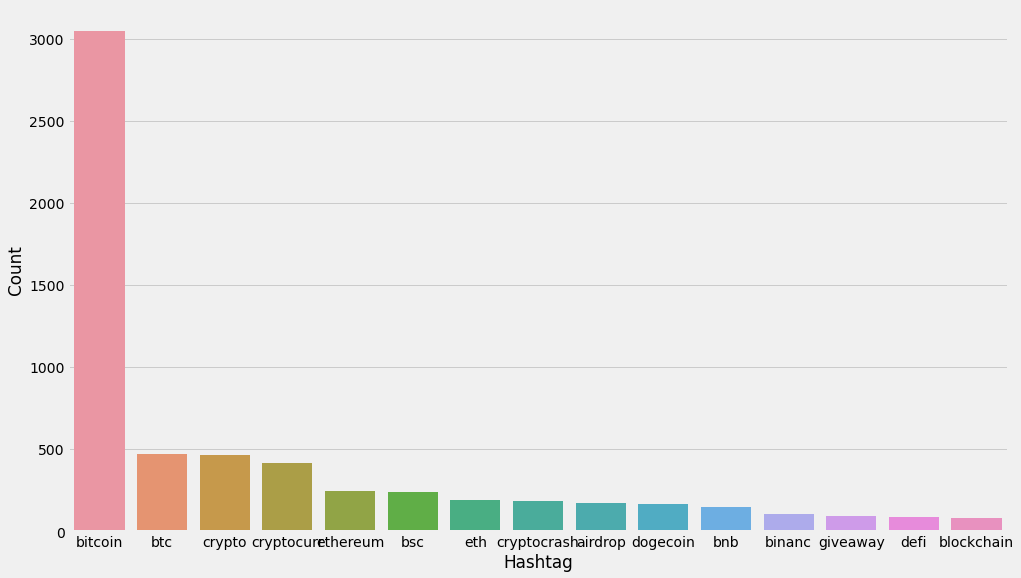

In [26]:
# select most frequently hashtafs
import seaborn as sns
d = d.nlargest(columns='Count',n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag',y='Count')
plt.show()

In [ ]:
# function Subjectivity
def getSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity
# function polarity
def detPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

df['Subjectivity'] = df['CleanTweets'].apply(getSubjectivity)
df['Polarity'] = df['CleanTweets'].apply(detPolarity)

In [28]:
df.head(10)

,Tweets,CleanTweets,Subjectivity,Polarity
0,"Long on love, long on #Bitcoin","long love, long #bitcoin",0.466667,0.133333
1,"Perpetual $BTC/USDT, 4h, .Seeing such high vo...","perpetu $btc/usdt, .see such high volum potent...",0.520000,0.080000
2,If #Bitcoin can hold the low put in last nigh...,"#bitcoin hold last night $34,760, flip suppli ...",0.066667,0.000000
3,#Bitcoin is hope https://t.co/2WWjqmxNRi,#bitcoin hope https://t.co/2wwjqmxnri,0.000000,0.000000
4,CryptoCryptCrypCry 😢😢😢#cryptocrash #Crypto #cr...,cryptocryptcrypcri 😢😢😢#cryptocrash #crypto #cr...,0.000000,0.000000
5,Congrats to those who bought $btc resp. $ada a...,congrat those bought $btc resp. $ada $30k resp...,0.000000,0.000000
6,#camgirl #webmodel #show #chaturbategirl #boo...,#camgirl #webmodel #show #chaturbategirl #boot...,0.000000,0.000000
7,he is the mastermind behind crypto and the ...,mastermind behind crypto owner best exchang wo...,0.500000,0.300000
8,#Bitcoin Spring type action underway. The dip ...,#bitcoin spring type action underway. $28k are...,0.354667,0.158667
9,"Hey, get 20 TRADE tokens and spread great tech...","hey, trade token spread great technology. it’ ...",0.845833,0.483333


In [165]:
# function text Sentiment text
def getSentiment(score):
    if score > 0 :
        return 'Positive'
    else:
        return 'Negative'

In [166]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.to_csv('BitcoinTweet.csv', index=False)

In [190]:
df = pd.read_csv('BitcoinTweet.csv')

In [191]:
df.tail(20)

,Unnamed: 0,Tweets,CleanTweets,Subjectivity,Polarity,Sentiment
2980,2980,in half an hour #btc up to 3.5k fron that bott...,half hour #btc 3.5k fron that bottom fast furi...,0.383333,0.016667,Positive
2981,2981,"Bitcoin Crashes Below $30,000; Erases Gain for...","bitcoin crash below $30,000; eras gain year 20...",0.000000,0.000000,Negative
2982,2982,Zoom out &amp; take a look at the BIGGER pictu...,zoom &amp; take look bigger picture...#bitcoin...,0.500000,0.000000,Negative
2983,2983,If you’re panicking about the fiat value of yo...,"you’r panick about fiat valu your crypto’s, ha...",0.100000,0.300000,Positive
2984,2984,Expecting #bitcoin to break 28k within a month...,expect #bitcoin break within month24k would li...,0.400000,-0.200000,Negative
2985,2985,"JUST IN - Iran seized 7,000 cryptocurrency min...","just iran seiz 7,000 cryptocurr mine machin ab...",0.375000,0.000000,Negative
2986,2986,China banning their #Bitcoin mining farms is a...,china ban their #bitcoin mine farm actual veri...,0.415000,0.263750,Positive
2987,2987,"Nice project, good luck, I hope this project ...","nice project, good luck, hope thi project goe ...",0.800000,0.650000,Positive
2988,2988,He's got Billions - easy for him to say what...,he' billion easi whatev wants. $31k...thi bigg...,0.100000,0.200000,Positive
2989,2989,Ask yourself this question: Why does Peter S...,yourself thi question: doe peter schiff onli t...,0.062500,0.000000,Negative


In [192]:
df.shape[0]

3000

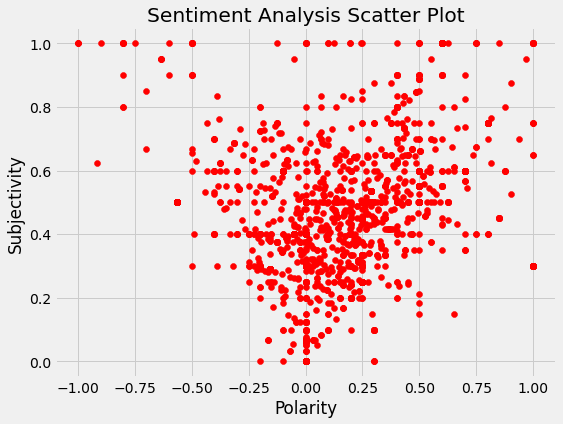

In [193]:
#Scatter plot for subjectivity and polarity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

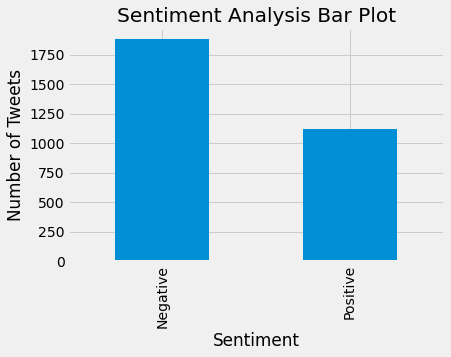

In [195]:
# bar chart
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [196]:
# bow
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [197]:
tfidf = TfidfVectorizer(max_features=10000)
x = df['CleanTweets']
y = df['Sentiment']

In [198]:
x = tfidf.fit_transform(x)

In [199]:
x

<3000x8089 sparse matrix of type '<class 'numpy.float64'>'
	with 45822 stored elements in Compressed Sparse Row format>

In [200]:
y

0       Positive
1       Positive
2       Negative
3       Negative
4       Negative
          ...   
2995    Negative
2996    Negative
2997    Negative
2998    Negative
2999    Positive
Name: Sentiment, Length: 3000, dtype: object

In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [202]:
x_train.shape

(2250, 8089)

In [203]:
x_train.shape, x_test.shape

((2250, 8089), (750, 8089))

In [204]:
y_train.shape, y_test.shape

((2250,), (750,))

In [205]:
x_train[0]

<1x8089 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [206]:
# mOdelTraining
import pickle
from sklearn.metrics import f1_score, accuracy_score

In [207]:
model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [208]:
y_predict = model.predict(x_test)

In [209]:
classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n    Negative       0.84      0.97      0.90       453\n    Positive       0.93      0.72      0.81       297\n\n    accuracy                           0.87       750\n   macro avg       0.89      0.84      0.86       750\nweighted avg       0.88      0.87      0.87       750\n'

In [ ]:

while True:
    a = input('Type your Comment: ') 
    vec = tfidf.transform([a])
    result = model.predict(vec)
    if result=='Positive':
        print('Positive Comment')
    else:
        print('Negative Comment')

    

Type your Comment: Earn bitcoin for better future.
Positive Comment
Type your Comment: Bitcoin price crash.
Negative Comment
